In [ ]:

!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 56.2 MB/s eta 0:00:00


In [ ]:
 from statsmodels.tsa.statespace.sarimax import SARIMAX
 from pmdarima import auto_arima

In [ ]:
import numpy as np
import pandas as pd

import datetime
import sklearn
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import geopy
import json
import ast

import math
import geopy.distance as gd
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error



import os

In [ ]:
print(os.getcwd())

/content


In [ ]:
# pip install utility


In [ ]:
import data_processing

In [ ]:
print(os.getcwd())

/content


In [ ]:
data = pd.read_csv("/content/orders_autumn_2020.csv")


In [ ]:
data

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
18701,2020-09-30 19:27:00.000,-1,1,60.170,24.946,60.170,24.945,24,23,0.0,12.8,2.34419,0.0
18702,2020-09-30 19:36:00.000,-8,6,60.185,24.944,60.178,24.949,23,15,0.0,12.8,2.34419,0.0
18703,2020-09-30 19:39:00.000,-14,3,60.186,24.949,60.188,24.956,25,11,0.0,12.8,2.34419,0.0
18704,2020-09-30 19:42:00.000,-11,3,60.172,24.929,60.168,24.930,21,10,0.0,12.8,2.34419,0.0


In [ ]:
print("No. of data points",len(data))

No. of data points 18706


In [ ]:
data.isna().sum()

,0
TIMESTAMP,0
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,0
ITEM_COUNT,0
USER_LAT,0
USER_LONG,0
VENUE_LAT,0
VENUE_LONG,0
ESTIMATED_DELIVERY_MINUTES,0
ACTUAL_DELIVERY_MINUTES,0
CLOUD_COVERAGE,277


In [ ]:
print("Starting date from data: ", min(data["TIMESTAMP"]))
print("Ending date from data: ", max(data["TIMESTAMP"]))

Starting date from data:  2020-08-01 06:07:00.000
Ending date from data:  2020-09-30 20:04:00.000


In [ ]:
data.iloc[200,:]

,200
TIMESTAMP,2020-08-01 15:58:00.000
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,-15
ITEM_COUNT,1
USER_LAT,60.158
USER_LONG,24.952
VENUE_LAT,60.16
VENUE_LONG,24.941
ESTIMATED_DELIVERY_MINUTES,38
ACTUAL_DELIVERY_MINUTES,23
CLOUD_COVERAGE,0.0


In [ ]:
data["time"] = pd.to_datetime(data["TIMESTAMP"])

In [ ]:
data["time"]

,time
0,2020-08-01 06:07:00
1,2020-08-01 06:17:00
2,2020-08-01 06:54:00
3,2020-08-01 07:09:00
4,2020-08-01 07:10:00
...,...
18701,2020-09-30 19:27:00
18702,2020-09-30 19:36:00
18703,2020-09-30 19:39:00
18704,2020-09-30 19:42:00


In [ ]:
data

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,time
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,2020-08-01 06:07:00
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,2020-08-01 06:17:00
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,2020-08-01 06:54:00
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,2020-08-01 07:09:00
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,2020-08-01 07:10:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18701,2020-09-30 19:27:00.000,-1,1,60.170,24.946,60.170,24.945,24,23,0.0,12.8,2.34419,0.0,2020-09-30 19:27:00
18702,2020-09-30 19:36:00.000,-8,6,60.185,24.944,60.178,24.949,23,15,0.0,12.8,2.34419,0.0,2020-09-30 19:36:00
18703,2020-09-30 19:39:00.000,-14,3,60.186,24.949,60.188,24.956,25,11,0.0,12.8,2.34419,0.0,2020-09-30 19:39:00
18704,2020-09-30 19:42:00.000,-11,3,60.172,24.929,60.168,24.930,21,10,0.0,12.8,2.34419,0.0,2020-09-30 19:42:00


In [ ]:
data["date"]= data["time"].dt.date
data["hour"] = data["time"].dt.hour
data["weekday"] = data["time"].dt.weekday

In [ ]:
data.loc[data["date"]==datetime.date(2020, 8, 1)]

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,time,date,hour,weekday
0,2020-08-01 06:07:00.000,-19,1,60.158,24.946,60.160,24.946,29,10,0.0,15.0,3.53644,0.0,2020-08-01 06:07:00,2020-08-01,6,5
1,2020-08-01 06:17:00.000,-7,8,60.163,24.927,60.153,24.910,39,32,0.0,15.0,3.53644,0.0,2020-08-01 06:17:00,2020-08-01,6,5
2,2020-08-01 06:54:00.000,-17,4,60.161,24.937,60.162,24.939,23,6,0.0,15.0,3.53644,0.0,2020-08-01 06:54:00,2020-08-01,6,5
3,2020-08-01 07:09:00.000,-2,3,60.185,24.954,60.190,24.911,28,26,0.0,16.7,3.52267,0.0,2020-08-01 07:09:00,2020-08-01,7,5
4,2020-08-01 07:10:00.000,-1,2,60.182,24.955,60.178,24.949,27,26,0.0,16.7,3.52267,0.0,2020-08-01 07:10:00,2020-08-01,7,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
294,2020-08-01 20:00:00.000,-16,1,60.165,24.937,60.167,24.940,30,14,0.0,16.7,2.10514,0.0,2020-08-01 20:00:00,2020-08-01,20,5
295,2020-08-01 20:23:00.000,-2,4,60.194,24.941,60.194,24.956,27,25,0.0,16.7,2.10514,0.0,2020-08-01 20:23:00,2020-08-01,20,5
296,2020-08-01 20:47:00.000,3,1,60.183,24.961,60.187,24.961,26,29,0.0,16.7,2.10514,0.0,2020-08-01 20:47:00,2020-08-01,20,5
297,2020-08-01 21:22:00.000,-13,4,60.178,24.927,60.167,24.940,34,21,0.0,16.7,2.32975,0.0,2020-08-01 21:22:00,2020-08-01,21,5


In [ ]:
data.loc[data["date"]==datetime.date(2020, 8, 1)].groupby("hour").count()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,time,date,weekday
hour,,,,,,,,,,,,,,,,
6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
8,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
9,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
10,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
11,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29,29
12,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30,30
13,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21,21
14,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23,23


In [ ]:
data.loc[data["date"]==datetime.date(2020, 8, 2)].groupby("hour").count()

,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,time,date,weekday
hour,,,,,,,,,,,,,,,,
6,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
7,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5
8,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17,17
9,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26,26
10,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
11,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46
12,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27,27
13,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32,32
14,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39,39


In [ ]:

no_orders_hourly = data.groupby("hour").count()["TIMESTAMP"]
data["ITEM_COUNT"] = pd.to_numeric(data["ITEM_COUNT"], errors="coerce")
item_count_hourly = data.groupby("hour")["ITEM_COUNT"].sum()


no_orders_hourly

,TIMESTAMP
hour,
4,3
5,78
6,198
7,610
8,1521
9,1593
10,1487
11,1337
12,1292


[ 6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21  5 22  4]
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]


Text(0.5, 1.0, 'Orders crowd for each hour')

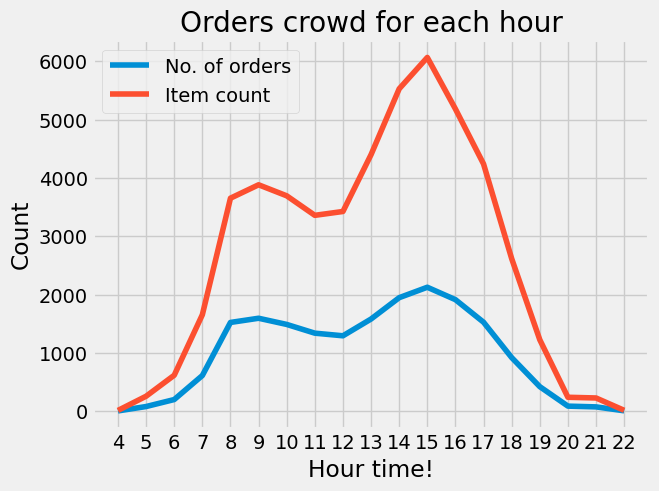

In [ ]:
print(data.hour.unique())
hour_idx = [i for i, _ in enumerate(data.hour.unique())]

print(hour_idx)
plt.plot(hour_idx, no_orders_hourly)
plt.plot(hour_idx,item_count_hourly)
plt.legend(["No. of orders", "Item count"])

plt.xticks(hour_idx, ["4","5", "6","7","8","9","10","11","12","13","14","15","16","17","18","19","20","21","22"])
plt.xlabel("Hour time!")
plt.ylabel("Count")
plt.title("Orders crowd for each hour")

In [ ]:
weekdata_group = data.groupby("weekday").count()

[5 6 0 1 2 3 4]


Text(0, 0.5, 'No. of orders')

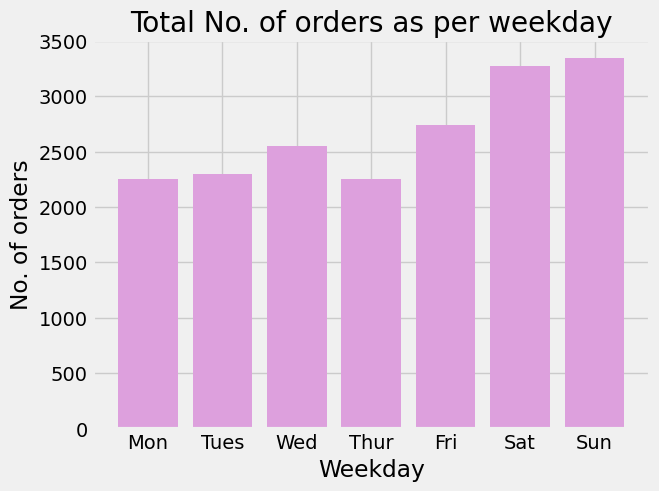

In [ ]:
print(data.weekday.unique())

weekday_idx = [i for i, _ in enumerate(data.weekday.unique())]

plt.bar(weekday_idx, weekdata_group["TIMESTAMP"].values, color='plum')
plt.xticks(weekday_idx, ["Mon", "Tues", "Wed", "Thur", "Fri", "Sat", "Sun"])
plt.title("Total No. of orders as per weekday")
plt.xlabel("Weekday")
plt.ylabel("No. of orders")

In [ ]:
print("No. of deliveries for which time gets exceeded from estimated delivery time: ", len(data[data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"] >0]))
print("No. of deliveries for which before estimated time: ", len(data[data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"] <0]))

No. of deliveries for which time gets exceeded from estimated delivery time:  7662
No. of deliveries for which before estimated time:  10255


[7662, 10255]


([<matplotlib.patches.Wedge at 0x7aef98054950>,
 [Text(0.24791490578718373, 1.0716987447452442, 'LATE'),
  Text(-0.24791480544750455, -1.071698767956708, 'BEFORE-TIME')],
 [Text(0.13522631224755474, 0.584562951679224, '43%'),
  Text(-0.13522625751682066, -0.5845629643400225, '57%')])

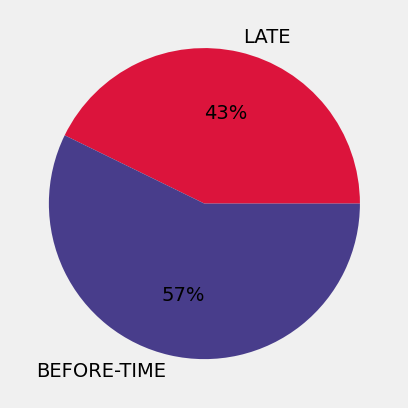

In [ ]:
sizes = [len(data[data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"] >0]), len(data[data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"] <0])]
labels = ["LATE", "BEFORE-TIME"]
print(sizes)
plt.pie(sizes, labels=labels, colors = ['crimson','darkslateblue'], autopct='%1.0f%%')

Text(0.5, 1.0, 'Delay time distribution')

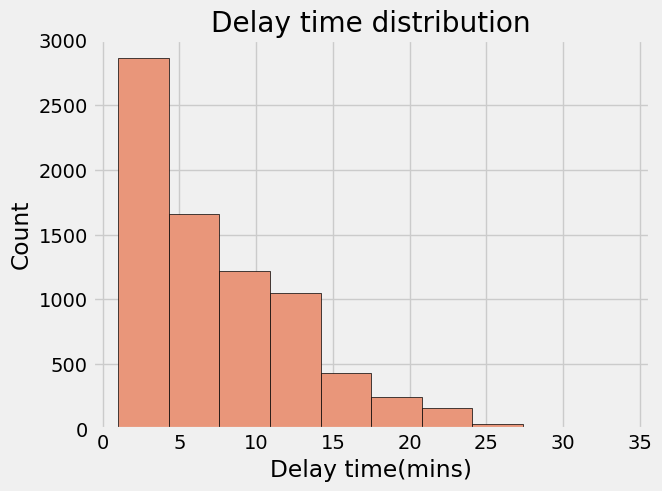

In [ ]:
plt.hist(data[data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"] >0]["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"], color="darksalmon", edgecolor='black')
plt.ylabel("Count")
plt.xlabel("Delay time(mins)")
plt.title("Delay time distribution")

In [ ]:
print("Maximum delay happened in delivery(minutes)", max(data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"]))
print("Minimum delay happened in delivery(minutes)", min(data[data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"]>0]["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"]))


Maximum delay happened in delivery(minutes) 34
Minimum delay happened in delivery(minutes) 1


In [ ]:
data.groupby(pd.cut(data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"], [0,10,20,30,40])).count()

<ipython-input-26-56c1a7b45553>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data.groupby(pd.cut(data["ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES"], [0,10,20,30,40])).count()


,TIMESTAMP,ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,ITEM_COUNT,USER_LAT,USER_LONG,VENUE_LAT,VENUE_LONG,ESTIMATED_DELIVERY_MINUTES,ACTUAL_DELIVERY_MINUTES,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,time,date,hour,weekday
ACTUAL_DELIVERY_MINUTES - ESTIMATED_DELIVERY_MINUTES,,,,,,,,,,,,,,,,,
"(0, 10]",5738,5738,5738,5738,5738,5738,5738,5738,5738,5656,5656,5656,5738,5738,5738,5738,5738
"(10, 20]",1719,1719,1719,1719,1719,1719,1719,1719,1719,1689,1689,1689,1719,1719,1719,1719,1719
"(20, 30]",200,200,200,200,200,200,200,200,200,196,196,196,200,200,200,200,200
"(30, 40]",5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5


In [ ]:
def calculate_dist_user_venue(coord1, coord2):
    distance_geopy = gd.distance(coord1, coord2).km
    return distance_geopy

In [ ]:
data["dist_user_venue"] = data.apply(lambda x: calculate_dist_user_venue((x["USER_LAT"], x["USER_LONG"]), (x["VENUE_LAT"], x["VENUE_LONG"])), axis=1)

In [ ]:
data["dist_user_venue"]

,dist_user_venue
0,0.222830
1,1.460344
2,0.157311
3,2.449984
4,0.556318
...,...
18701,0.055513
18702,0.827796
18703,0.447776
18704,0.449105


Text(0, 0.5, 'Count')

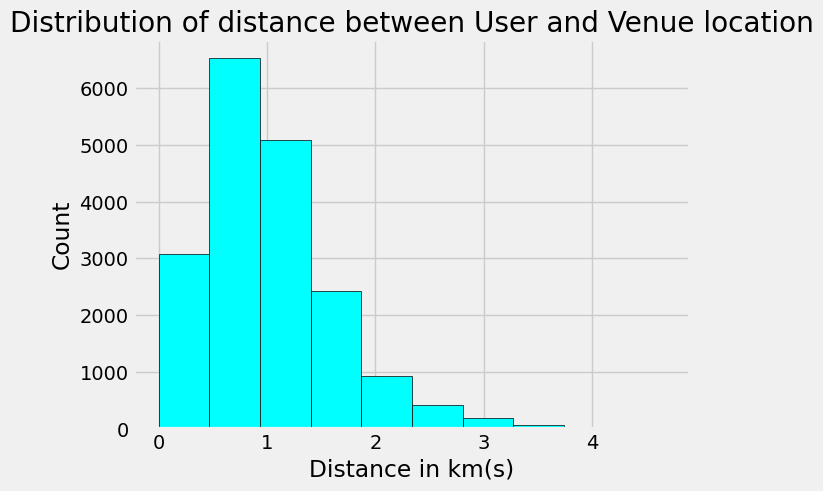

In [ ]:
plt.hist(data["dist_user_venue"], color="aqua", edgecolor='black')
plt.title("Distribution of distance between User and Venue location")
plt.xlabel("Distance in km(s)")
plt.ylabel("Count")

In [ ]:
df1 = data[["date","hour"]]

In [ ]:
df1["no_of_orders"] = 1

<ipython-input-32-28141704873b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["no_of_orders"] = 1


In [ ]:
import utility



In [ ]:
if ((df1["date"]==datetime.date(2020, 8, 1)) & (df1["hour"]==4)).any():
    print("Yes")
else:
    print("NO")

list_dates = df1.date.unique()
df1 = utility.fill_all_hour_data(df1, list_dates)


NO


In [ ]:
df1 = df1.sort_values(by=["date"])

In [ ]:
df1

,date,hour,no_of_orders
0,2020-08-01,6,1
205,2020-08-01,16,1
204,2020-08-01,16,1
203,2020-08-01,16,1
202,2020-08-01,16,1
...,...,...,...
18550,2020-09-30,14,1
18551,2020-09-30,14,1
18552,2020-09-30,14,1
18546,2020-09-30,14,1


In [ ]:
df1 = df1.set_index('date')
print("Dates which are missing", pd.date_range(
  start="2020-08-01", end="2020-09-30").difference(df1.index))
df1 = df1.reset_index()

Dates which are missing DatetimeIndex([], dtype='datetime64[ns]', freq='D')


In [ ]:
df1.groupby(["date", "hour"]).sum()

no_of_orders
date       hour              
2020-08-01 4                0
           5                0
           6                3
           7                6
           8               15
...                       ...
2020-09-30 18              19
           19               8
           20               1
           21               0
           22               0

[1159 rows x 1 columns]

In [ ]:
df_hourly_orders = df1.groupby(["date", "hour"]).sum().reset_index()["no_of_orders"]

In [ ]:
df_hourly_orders

,no_of_orders
0,0
1,0
2,3
3,6
4,15
...,...
1154,19
1155,8
1156,1
1157,0


In [ ]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_hourly_orders)  # replace 'orders' with your column
print('ADF Statistic:', result[0])
print('p-value:', result[1])


ADF Statistic: -4.665836319468874
p-value: 9.750825517005903e-05


Text(0.5, 1.0, 'All orders plot grouped by date and hour')

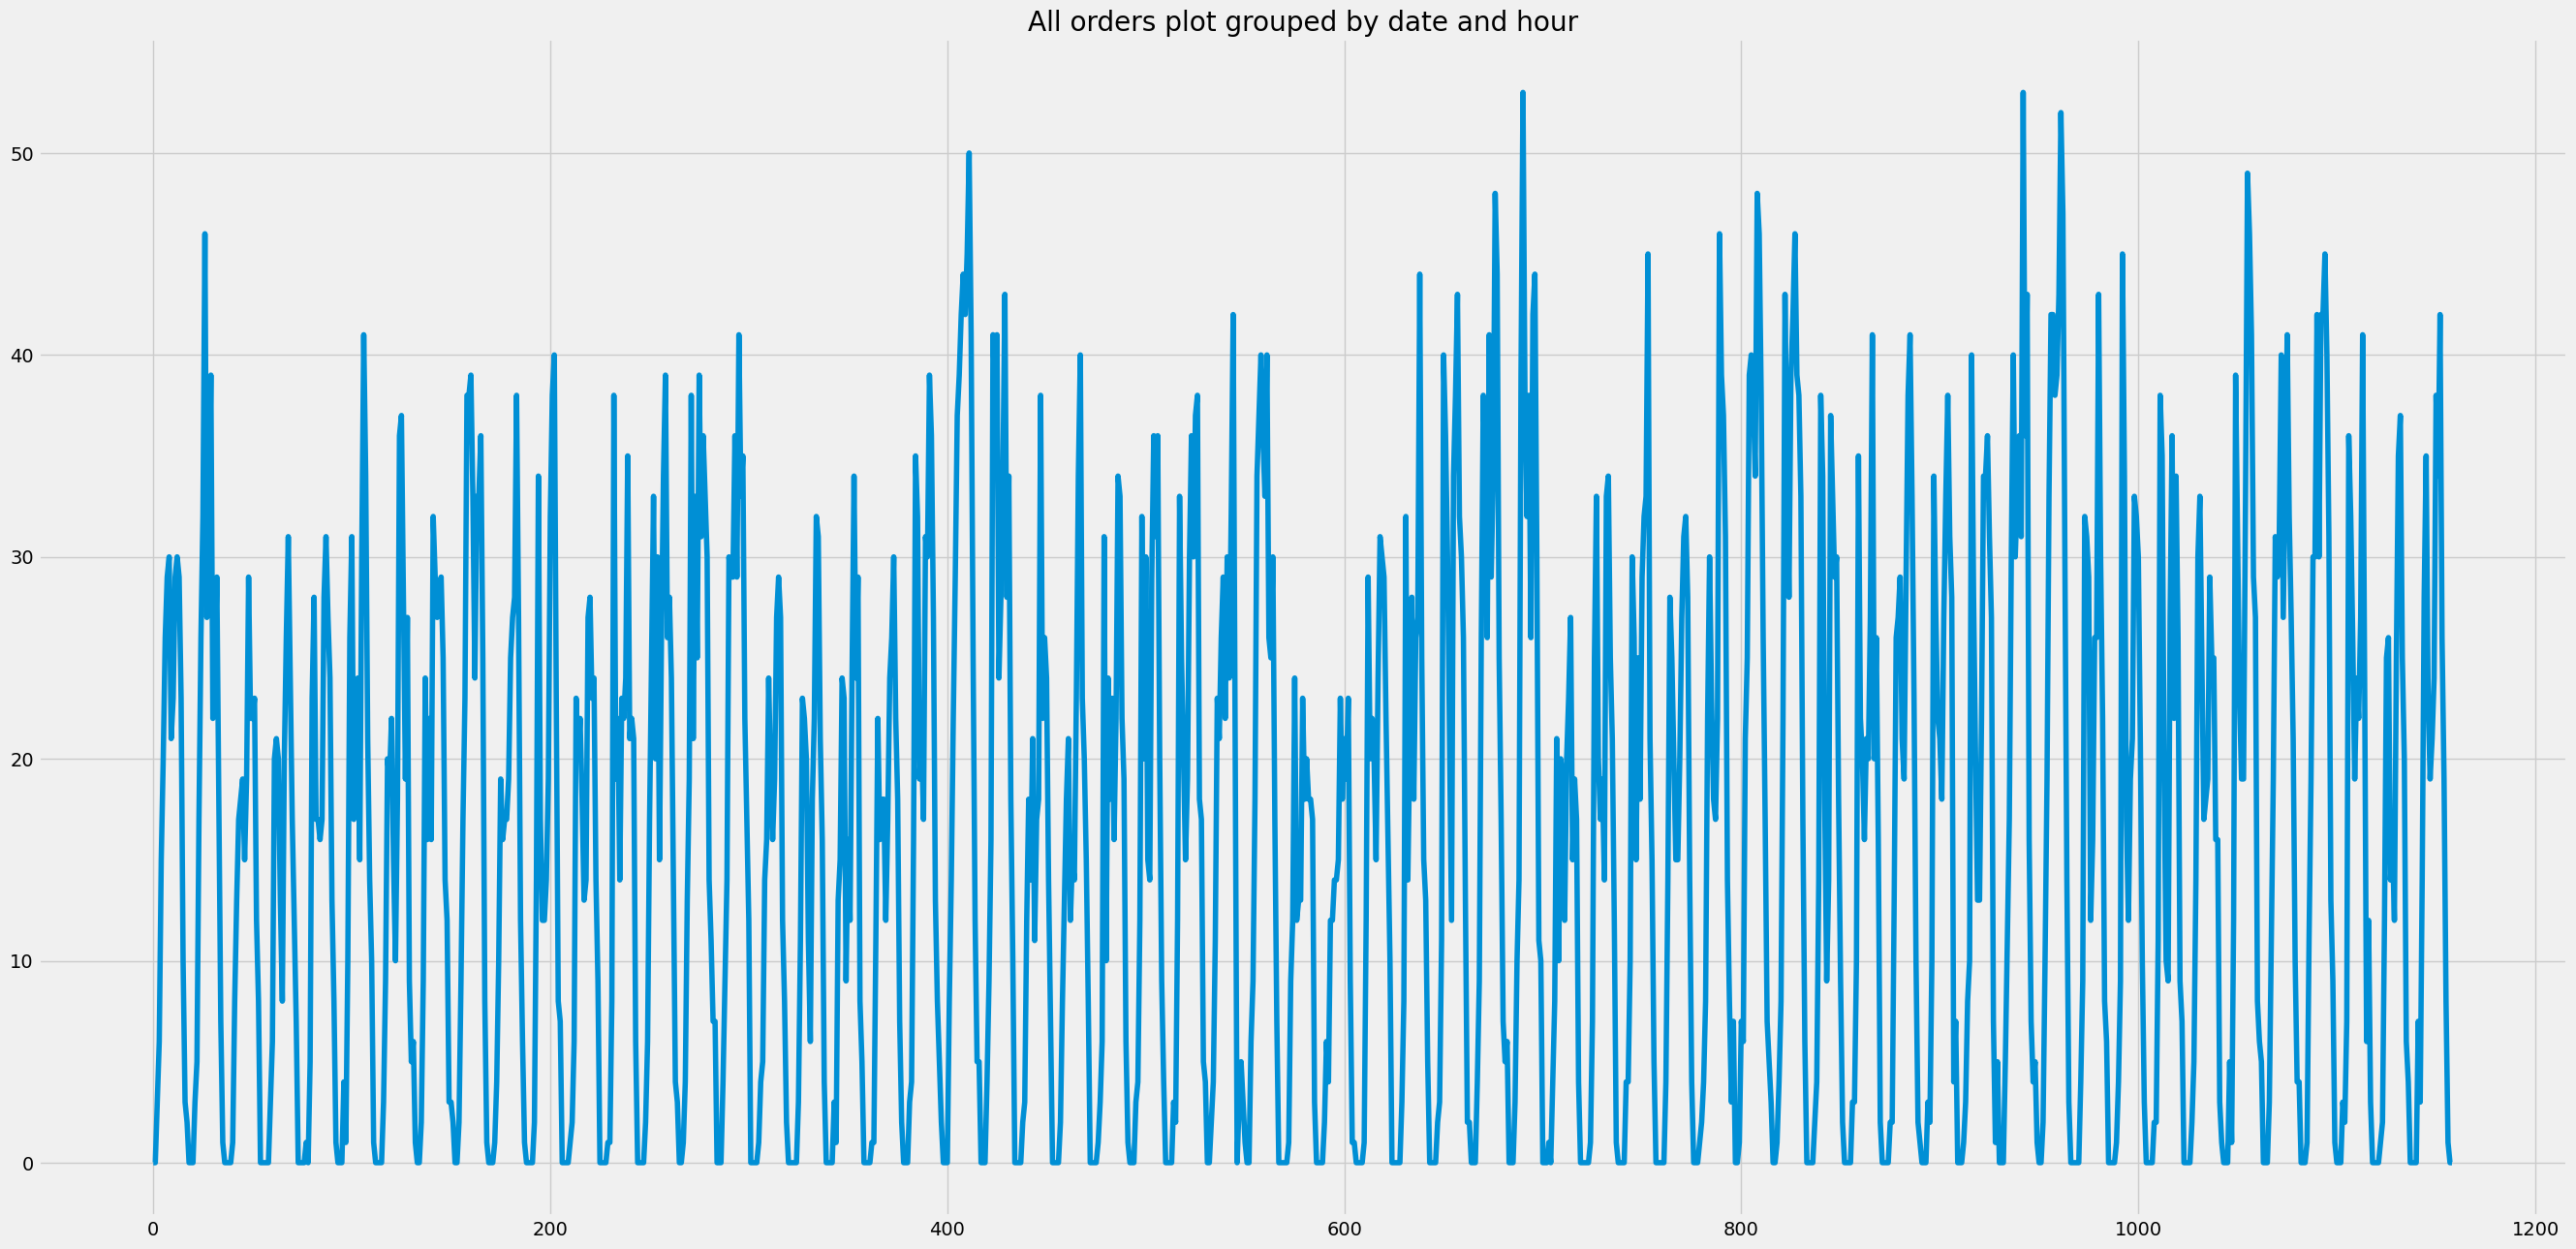

In [ ]:
plt.figure(figsize=(30,15))
plt.plot(df_hourly_orders)
plt.title("All orders plot grouped by date and hour")

In [ ]:

scaler=MinMaxScaler(feature_range=(0,1))
df_hourly_orders=scaler.fit_transform(np.array(df_hourly_orders).reshape(-1,1))

In [ ]:
df_hourly_orders

array([[0.        ],
       [0.        ],
       [0.05660377],
       ...,
       [0.01886792],
       [0.        ],
       [0.        ]])

In [ ]:
train_data, training_size, test_data, test_size = utility.train_test_split_(df_hourly_orders,0.65)


In [ ]:
training_size,test_size

(753, 406)

In [ ]:
time_step = 10
X_train, y_train = utility.dataset_creation(train_data, time_step)
X_test, ytest = utility.dataset_creation(test_data, time_step)

In [ ]:
print(X_train.shape), print(y_train.shape)

(742, 10)
(742,)


(None, None)

In [ ]:
## Reshaping the data so that it can be inputted into the DL model

X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
 !pip install tensorflow

In [ ]:
 !pip install tensorflow==2.12 keras==2.12

INFO: pip is looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
INFO: pip is still looking at multiple versions of jax to determine which version is compatible with other requirements. This could take a while.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 586.0/586.0 MB 996.3 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 65.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 68.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 51.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 21.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 88.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.7/440.7 kB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.4/78.4 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.6/79.6 MB 10.0 MB/s eta 0:00:00
  At

In [ ]:
#  from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(10,1)))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

In [ ]:
hist =  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=64,verbose=1)
# with ope

Epoch 1/100
12/12 [==============================] - 12s 158ms/step - loss: 0.1062 - val_loss: 0.0988
Epoch 2/100
12/12 [==============================] - 0s 30ms/step - loss: 0.0687 - val_loss: 0.0849
Epoch 3/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0592 - val_loss: 0.0687
Epoch 4/100
12/12 [==============================] - 0s 38ms/step - loss: 0.0481 - val_loss: 0.0481
Epoch 5/100
12/12 [==============================] - 0s 41ms/step - loss: 0.0395 - val_loss: 0.0427
Epoch 6/100
12/12 [==============================] - 1s 51ms/step - loss: 0.0365 - val_loss: 0.0418
Epoch 7/100
12/12 [==============================] - 1s 50ms/step - loss: 0.0332 - val_loss: 0.0383
Epoch 8/100
12/12 [==============================] - 1s 45ms/step - loss: 0.0305 - val_loss: 0.0398
Epoch 9/100
12/12 [==============================] - 0s 26ms/step - loss: 0.0301 - val_loss: 0.0365
Epoch 10/100
12/12 [==============================] - 0s 27ms/step - loss: 0.0295 - val_loss: 0.03

In [ ]:
utility.save_json('history.json', hist.history)

In [ ]:
model.save("models/LSTMN_UNIVARIATE.h5")

[0.09882500767707825, 0.08490470051765442, 0.0687003955245018, 0.048117998987436295, 0.04272497817873955, 0.0418294221162796, 0.038288045674562454, 0.039800066500902176, 0.036462247371673584, 0.03714872896671295, 0.037217289209365845, 0.044999707490205765, 0.03556399047374725, 0.037135135382413864, 0.03513213247060776, 0.034117553383111954, 0.03395441174507141, 0.033871255815029144, 0.03314003348350525, 0.034135643392801285, 0.03259942680597305, 0.031146662309765816, 0.031347665935754776, 0.02906934544444084, 0.02875153347849846, 0.028197498992085457, 0.024277590215206146, 0.02480299025774002, 0.021309198811650276, 0.02602619305253029, 0.02561883069574833, 0.020311059430241585, 0.02045576088130474, 0.01857510581612587, 0.0180917177349329, 0.018214255571365356, 0.016698354855179787, 0.016305310651659966, 0.01711464114487171, 0.016183586791157722, 0.013834456913173199, 0.013711808249354362, 0.01539201382547617, 0.014639535918831825, 0.014188194647431374, 0.014270705170929432, 0.014520414

Text(0.5, 1.0, 'Loss Curve of Univariate Time Series Model')

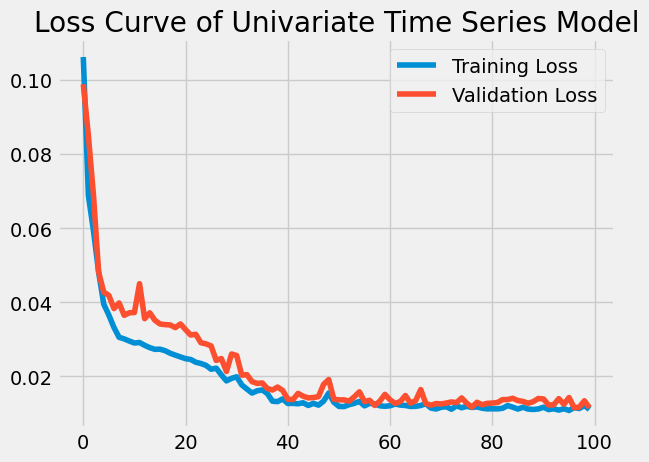

In [ ]:
with open('history.json', 'r') as f:
    hist_ = f.readlines()
print(ast.literal_eval(hist_[0])["val_loss"])
plt.plot(ast.literal_eval(hist_[0])["loss"])
plt.plot(ast.literal_eval(hist_[0])["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Loss Curve of Univariate Time Series Model")

In [ ]:
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

13/13 [==============================] - 0s 6ms/step


In [ ]:
print(test_predict)
print(scaler.inverse_transform(ytest.reshape(-1,1)))

[[ 1.13828726e+01]
 [ 2.51993694e+01]
 [ 2.88064709e+01]
 [ 2.12990322e+01]
 [ 1.79719524e+01]
 [ 1.92355213e+01]
 [ 2.30447769e+01]
 [ 2.84806557e+01]
 [ 3.08733559e+01]
 [ 2.71754074e+01]
 [ 2.30056839e+01]
 [ 1.88357697e+01]
 [ 9.82682419e+00]
 [ 2.93034530e+00]
 [-3.06901932e-01]
 [ 4.62944396e-02]
 [ 1.63430607e+00]
 [ 4.12705708e+00]
 [ 7.12951469e+00]
 [ 1.19910145e+01]
 [ 2.15320129e+01]
 [ 2.53065910e+01]
 [ 2.05288086e+01]
 [ 1.93378296e+01]
 [ 2.10081902e+01]
 [ 2.42377224e+01]
 [ 2.94474888e+01]
 [ 4.28533478e+01]
 [ 3.74258804e+01]
 [ 3.09743118e+01]
 [ 2.26625805e+01]
 [ 1.03827057e+01]
 [ 6.23593807e+00]
 [ 2.02299857e+00]
 [ 4.06494761e+00]
 [ 1.54478776e+00]
 [ 3.04870534e+00]
 [ 4.78611708e+00]
 [ 1.01106520e+01]
 [ 1.63150177e+01]
 [ 2.78233910e+01]
 [ 2.78777199e+01]
 [ 3.10908298e+01]
 [ 3.69055519e+01]
 [ 3.67626877e+01]
 [ 3.82593613e+01]
 [ 4.63637810e+01]
 [ 4.54480019e+01]
 [ 3.68458023e+01]
 [ 1.95852127e+01]
 [ 1.06740313e+01]
 [ 4.50208759e+00]
 [ 3.5414004

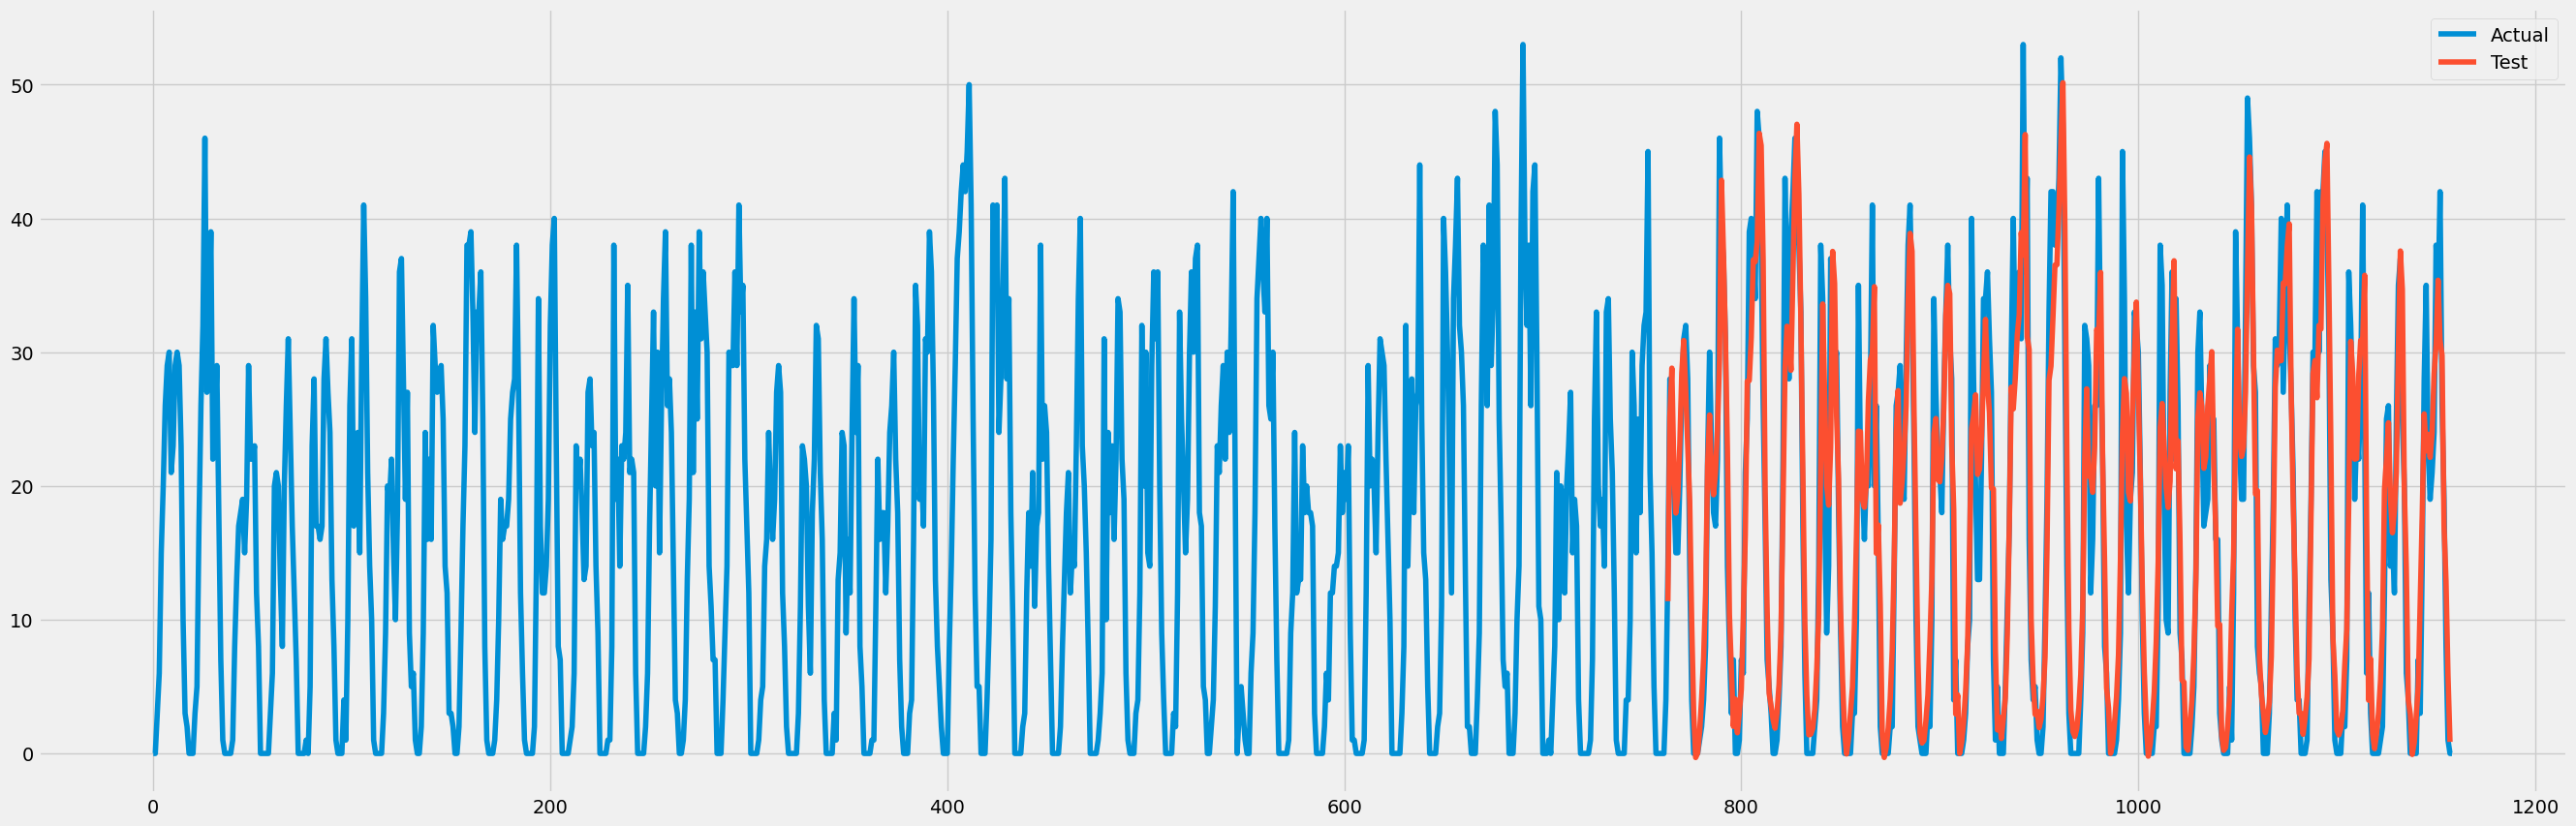

13/13 [==============================] - 0s 7ms/step


In [ ]:
plt.figure(figsize=(30,10))
look_back=10
trainPredictPlot = np.empty_like(df_hourly_orders)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(df_hourly_orders)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df_hourly_orders)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(df_hourly_orders))
plt.plot(testPredictPlot)
plt.legend(["Actual","Test"])
plt.show()

train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)


In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

21.582070705689077

In [ ]:
math.sqrt(mean_squared_error(y_train,train_predict))

20.21484467720076

In [ ]:
df2 = data[["date","hour","CLOUD_COVERAGE","TEMPERATURE","WIND_SPEED","PRECIPITATION"]]
df2["no_of_orders"] = 1

<ipython-input-63-fc3b11a56c00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2["no_of_orders"] = 1


In [ ]:
print(df2.date.unique())

list_dates = df2.date.unique()

df2 = utility.fill_all_hour_data(df2, list_dates,ismultivariate=True)

[datetime.date(2020, 8, 1) datetime.date(2020, 8, 2)
 datetime.date(2020, 8, 3) datetime.date(2020, 8, 4)
 datetime.date(2020, 8, 5) datetime.date(2020, 8, 6)
 datetime.date(2020, 8, 7) datetime.date(2020, 8, 8)
 datetime.date(2020, 8, 9) datetime.date(2020, 8, 10)
 datetime.date(2020, 8, 11) datetime.date(2020, 8, 12)
 datetime.date(2020, 8, 13) datetime.date(2020, 8, 14)
 datetime.date(2020, 8, 15) datetime.date(2020, 8, 16)
 datetime.date(2020, 8, 17) datetime.date(2020, 8, 18)
 datetime.date(2020, 8, 19) datetime.date(2020, 8, 20)
 datetime.date(2020, 8, 21) datetime.date(2020, 8, 22)
 datetime.date(2020, 8, 23) datetime.date(2020, 8, 24)
 datetime.date(2020, 8, 25) datetime.date(2020, 8, 26)
 datetime.date(2020, 8, 27) datetime.date(2020, 8, 28)
 datetime.date(2020, 8, 29) datetime.date(2020, 8, 30)
 datetime.date(2020, 8, 31) datetime.date(2020, 9, 1)
 datetime.date(2020, 9, 2) datetime.date(2020, 9, 3)
 datetime.date(2020, 9, 4) datetime.date(2020, 9, 5)
 datetime.date(2020, 9, 

In [ ]:
df2

,date,hour,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION,no_of_orders
0,2020-08-01,6,0.0,15.0,3.53644,0.0,1
1,2020-08-01,6,0.0,15.0,3.53644,0.0,1
2,2020-08-01,6,0.0,15.0,3.53644,0.0,1
3,2020-08-01,7,0.0,16.7,3.52267,0.0,1
4,2020-08-01,7,0.0,16.7,3.52267,0.0,1
...,...,...,...,...,...,...,...
0,2020-09-29,21,0.0,0.0,0.00000,0.0,0
0,2020-09-29,22,0.0,0.0,0.00000,0.0,0
0,2020-09-30,4,0.0,0.0,0.00000,0.0,0
0,2020-09-30,21,0.0,0.0,0.00000,0.0,0


In [ ]:
multivariate_data = df2.groupby(["date","hour"]).aggregate({"no_of_orders":np.sum,"CLOUD_COVERAGE":np.mean,"TEMPERATURE":np.mean,"WIND_SPEED":np.mean,"PRECIPITATION":np.mean})

<ipython-input-66-7d534a752eb6>:1: FutureWarning: The provided callable <function sum at 0x7aeffa001940> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  multivariate_data = df2.groupby(["date","hour"]).aggregate({"no_of_orders":np.sum,"CLOUD_COVERAGE":np.mean,"TEMPERATURE":np.mean,"WIND_SPEED":np.mean,"PRECIPITATION":np.mean})
<ipython-input-66-7d534a752eb6>:1: FutureWarning: The provided callable <function mean at 0x7aeffa002fc0> is currently using SeriesGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  multivariate_data = df2.groupby(["date","hour"]).aggregate({"no_of_orders":np.sum,"CLOUD_COVERAGE":np.mean,"TEMPERATURE":np.mean,"WIND_SPEED":np.mean,"PRECIPITATION":np.mean})


In [ ]:
multivariate_data

no_of_orders  CLOUD_COVERAGE  TEMPERATURE  WIND_SPEED  \
date       hour                                                          
2020-08-01 4                0             0.0          0.0     0.00000   
           5                0             0.0          0.0     0.00000   
           6                3             0.0         15.0     3.53644   
           7                6             0.0         16.7     3.52267   
           8               15            25.0         17.8     3.35088   
...                       ...             ...          ...         ...   
2020-09-30 18              19            45.0         12.8     2.24368   
           19               8             0.0         12.8     2.34419   
           20               1             0.0         12.8     2.34249   
           21               0             0.0          0.0     0.00000   
           22               0             0.0          0.0     0.00000   

                 PRECIPITATION  
date       hour                 
2020-08-01 4               0.0  
           5               0.0  
           6               0.0  
           7               0.0  
           8               0.0  
...                        ...  
2020-09-30 18              0.0  
           19              0.0  
           20              0.0  
           21              0.0  
           22              0.0  

[1159 rows x 5 columns]

In [ ]:
multivariate_data = multivariate_data.reset_index().drop(columns=["date","hour"])
multivariate_data

,no_of_orders,CLOUD_COVERAGE,TEMPERATURE,WIND_SPEED,PRECIPITATION
0,0,0.0,0.0,0.00000,0.0
1,0,0.0,0.0,0.00000,0.0
2,3,0.0,15.0,3.53644,0.0
3,6,0.0,16.7,3.52267,0.0
4,15,25.0,17.8,3.35088,0.0
...,...,...,...,...,...
1154,19,45.0,12.8,2.24368,0.0
1155,8,0.0,12.8,2.34419,0.0
1156,1,0.0,12.8,2.34249,0.0
1157,0,0.0,0.0,0.00000,0.0


In [ ]:
multivariate_data.isna().sum()

,0
no_of_orders,0
CLOUD_COVERAGE,14
TEMPERATURE,14
WIND_SPEED,14
PRECIPITATION,0


In [ ]:
multivariate_data = np.array(multivariate_data)

In [ ]:
multivariate_data.shape

(1159, 5)

In [ ]:
import numpy as np

# Assuming multivariate_data is a NumPy array

# Fill NaNs in column index 1 (CLOUD_COVERAGE)
multivariate_data[:, 1] = np.where(
    np.isnan(multivariate_data[:, 1]),
    np.nanmean(multivariate_data[:, 1]),
    multivariate_data[:, 1]
)

# Fill NaNs in column index 2 (TEMPERATURE)
multivariate_data[:, 2] = np.where(
    np.isnan(multivariate_data[:, 2]),
    np.nanmean(multivariate_data[:, 2]),
    multivariate_data[:, 2]
)

# Fill NaNs in column index 3 (WIND_SPEED)
multivariate_data[:, 3] = np.where(
    np.isnan(multivariate_data[:, 3]),
    np.nanmean(multivariate_data[:, 3]),
    multivariate_data[:, 3]
)



In [ ]:
multivariate_data.shape

(1159, 5)

In [ ]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Define column names (adjust if different)
columns = ['no_of_orders', 'CLOUD_COVERAGE', 'TEMPERATURE', 'WIND_SPEED', 'PRECIPITATION']

# Convert the NumPy array to a DataFrame
multivariate_data = pd.DataFrame(multivariate_data, columns=columns)

# Initialize the scalers dictionary
scalers = {}

# Scale each column individually
for col in multivariate_data.columns:
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaled_values = scaler.fit_transform(multivariate_data[col].values.reshape(-1, 1))
    multivariate_data[col] = scaled_values.flatten()
    scalers['scaler_' + col] = scaler


In [ ]:
multivariate_data = np.array(multivariate_data)

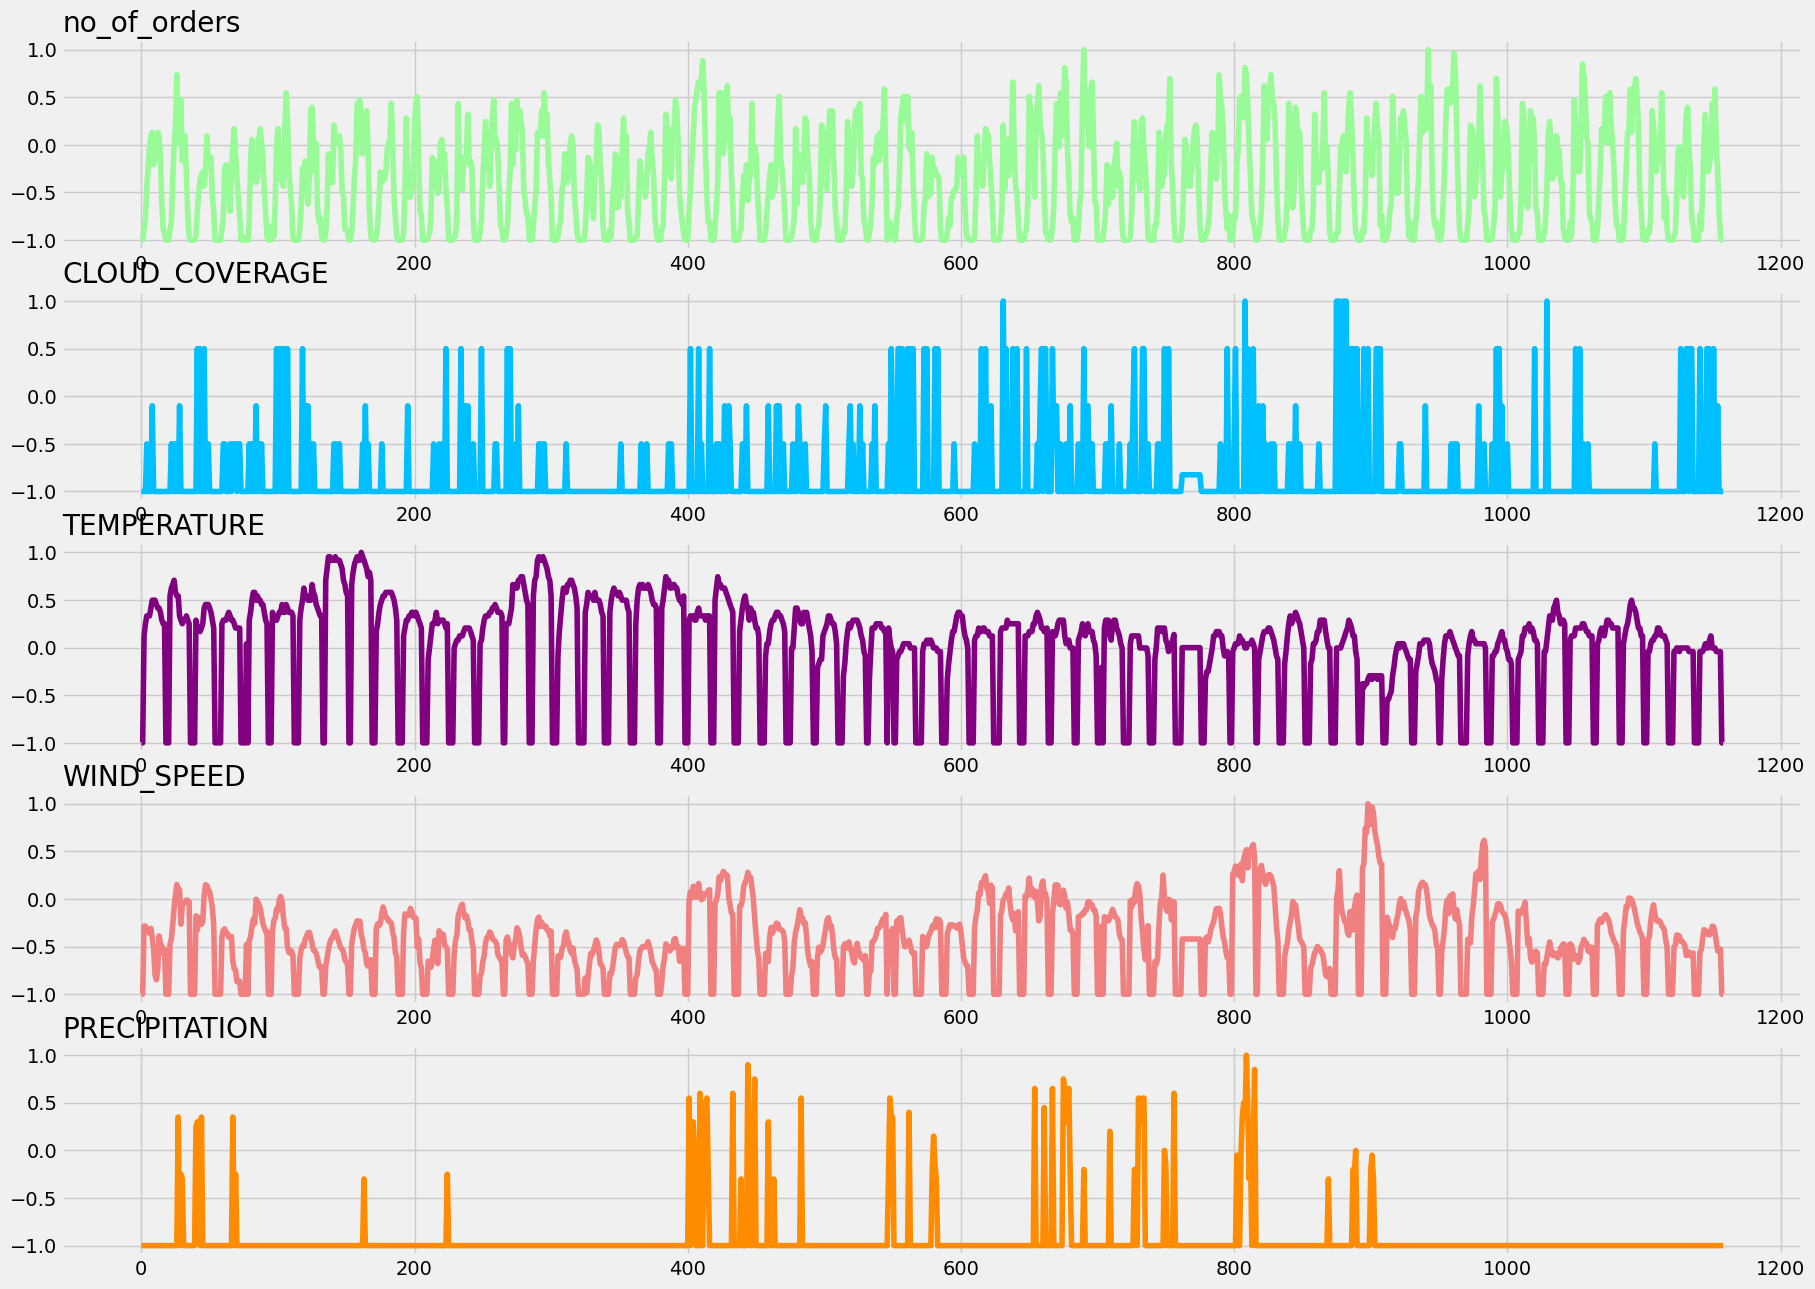

In [ ]:
groups = [0,1,2,3,4]
columns = ["no_of_orders", "CLOUD_COVERAGE", "TEMPERATURE", "WIND_SPEED", "PRECIPITATION"]
color = ['palegreen', 'deepskyblue', 'purple', 'lightcoral', 'darkorange']

i=1
plt.figure(figsize=(20,15))
for group in groups:
    plt.subplot(len(groups), 1, i)
    plt.plot(multivariate_data[:, group], color=color[group])
    plt.title(columns[group], loc='left')
    i = i +1

plt.show()


In [ ]:
train_data, training_size, test_data, test_size = utility.train_test_split_multivariate(multivariate_data,0.65)

In [ ]:
time_step = 10
X_train, y_train = utility.dataset_creation(train_data, time_step, ismultivariate=True)
X_test, ytest = utility.dataset_creation(test_data, time_step, ismultivariate=True)

In [ ]:
import tensorflow

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(50,return_sequences=True))
model.add(LSTM(50))
model.add(Dense(1))
opt = tensorflow.keras.optimizers.Adam(learning_rate=0.0001)
model.compile(loss='mean_squared_error',optimizer=opt)

In [ ]:
hist =  model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=100,batch_size=128,verbose=1)
# with open('history_multivariate.json', 'w') as f:
#     json.dump(hist.history, f)



Epoch 1/100
6/6 [==============================] - 12s 318ms/step - loss: 0.3472 - val_loss: 0.3617
Epoch 2/100
6/6 [==============================] - 0s 40ms/step - loss: 0.3150 - val_loss: 0.3407
Epoch 3/100
6/6 [==============================] - 0s 43ms/step - loss: 0.2864 - val_loss: 0.3239
Epoch 4/100
6/6 [==============================] - 0s 40ms/step - loss: 0.2638 - val_loss: 0.3119
Epoch 5/100
6/6 [==============================] - 0s 42ms/step - loss: 0.2460 - val_loss: 0.3050
Epoch 6/100
6/6 [==============================] - 0s 41ms/step - loss: 0.2354 - val_loss: 0.3023
Epoch 7/100
6/6 [==============================] - 0s 43ms/step - loss: 0.2287 - val_loss: 0.3010
Epoch 8/100
6/6 [==============================] - 0s 40ms/step - loss: 0.2259 - val_loss: 0.2986
Epoch 9/100
6/6 [==============================] - 0s 42ms/step - loss: 0.2229 - val_loss: 0.2944
Epoch 10/100
6/6 [==============================] - 0s 41ms/step - loss: 0.2196 - val_loss: 0.2891
Epoch 11/100
6/6 

In [ ]:
utility.save_json('history_multivariate.json',hist.history)

In [ ]:
import json


In [ ]:
import ast

with open('history_multivariate.json', 'r') as f:
    data = f.read()  # Read full content, not line-by-line
    hist_ = ast.literal_eval(data)

print(hist_["val_loss"])


[0.36173921823501587, 0.34070491790771484, 0.32392793893814087, 0.3118751347064972, 0.30498239398002625, 0.3022996187210083, 0.3009506165981293, 0.2986469864845276, 0.29438042640686035, 0.2890855669975281, 0.2832289934158325, 0.27795282006263733, 0.2727854549884796, 0.2678391635417938, 0.2631623148918152, 0.25835874676704407, 0.2535339593887329, 0.24846328794956207, 0.2432841956615448, 0.23849833011627197, 0.23398172855377197, 0.22952409088611603, 0.2256941944360733, 0.22081372141838074, 0.2170291543006897, 0.21403613686561584, 0.21038992702960968, 0.20740191638469696, 0.20577244460582733, 0.20301219820976257, 0.19826476275920868, 0.19661280512809753, 0.19492602348327637, 0.19334788620471954, 0.19343827664852142, 0.18763314187526703, 0.19228695333003998, 0.1900699883699417, 0.1868325173854828, 0.19366148114204407, 0.18993724882602692, 0.18806657195091248, 0.19305160641670227, 0.191917285323143, 0.18746545910835266, 0.20067891478538513, 0.18308109045028687, 0.19307078421115875, 0.187595

In [ ]:
with open('history_multivariate.json', 'r') as f:
    print(f.read())


{"loss": [0.3471534848213196, 0.3149634599685669, 0.28640469908714294, 0.26383712887763977, 0.24601659178733826, 0.23544733226299286, 0.22866500914096832, 0.22585177421569824, 0.2229290008544922, 0.2195644974708557, 0.21619956195354462, 0.21257732808589935, 0.2092653512954712, 0.20598812401294708, 0.20266032218933105, 0.19913513958454132, 0.19568051397800446, 0.19233310222625732, 0.1888919174671173, 0.18557050824165344, 0.18225514888763428, 0.17898961901664734, 0.17588384449481964, 0.1726038008928299, 0.1693364679813385, 0.16600842773914337, 0.16272488236427307, 0.1594400703907013, 0.1559215486049652, 0.1529424786567688, 0.14947248995304108, 0.14636071026325226, 0.1432431936264038, 0.1401548683643341, 0.13764551281929016, 0.13499054312705994, 0.13264100253582, 0.13040900230407715, 0.12877660989761353, 0.12701453268527985, 0.12562818825244904, 0.12443011999130249, 0.12380001693964005, 0.12278426438570023, 0.12283866852521896, 0.12261240929365158, 0.120943084359169, 0.12098924070596695, 

In [ ]:
model.compile(optimizer='adam', loss='huber', metrics=['mae'])


In [ ]:
import json

with open('history_multivariate.json', 'r') as f:
    hist_ = json.load(f)

print(hist_.keys())  # Check available keys


dict_keys(['loss', 'val_loss'])


[0.36173921823501587, 0.34070491790771484, 0.32392793893814087, 0.3118751347064972, 0.30498239398002625, 0.3022996187210083, 0.3009506165981293, 0.2986469864845276, 0.29438042640686035, 0.2890855669975281, 0.2832289934158325, 0.27795282006263733, 0.2727854549884796, 0.2678391635417938, 0.2631623148918152, 0.25835874676704407, 0.2535339593887329, 0.24846328794956207, 0.2432841956615448, 0.23849833011627197, 0.23398172855377197, 0.22952409088611603, 0.2256941944360733, 0.22081372141838074, 0.2170291543006897, 0.21403613686561584, 0.21038992702960968, 0.20740191638469696, 0.20577244460582733, 0.20301219820976257, 0.19826476275920868, 0.19661280512809753, 0.19492602348327637, 0.19334788620471954, 0.19343827664852142, 0.18763314187526703, 0.19228695333003998, 0.1900699883699417, 0.1868325173854828, 0.19366148114204407, 0.18993724882602692, 0.18806657195091248, 0.19305160641670227, 0.191917285323143, 0.18746545910835266, 0.20067891478538513, 0.18308109045028687, 0.19307078421115875, 0.187595

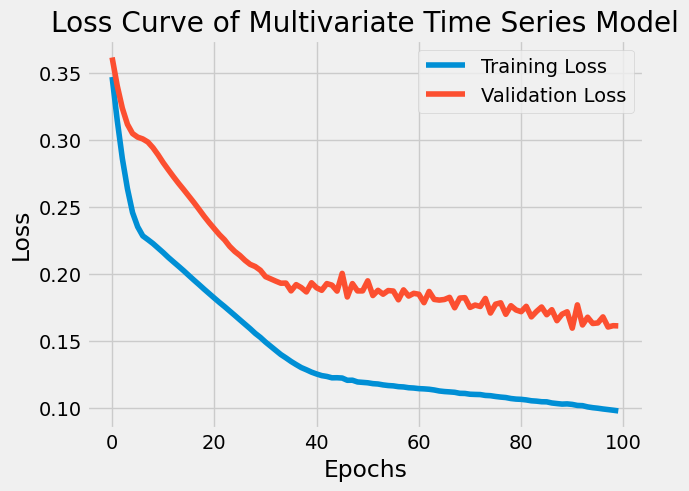

In [ ]:
import json
import matplotlib.pyplot as plt

# Load the JSON file
with open('history_multivariate.json', 'r') as f:
    hist_ = json.load(f)

# Print validation loss values
print(hist_["val_loss"])

# Plot training and validation loss
plt.plot(hist_["loss"])
plt.plot(hist_["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Loss Curve of Multivariate Time Series Model")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


[0.36173921823501587, 0.34070491790771484, 0.32392793893814087, 0.3118751347064972, 0.30498239398002625, 0.3022996187210083, 0.3009506165981293, 0.2986469864845276, 0.29438042640686035, 0.2890855669975281, 0.2832289934158325, 0.27795282006263733, 0.2727854549884796, 0.2678391635417938, 0.2631623148918152, 0.25835874676704407, 0.2535339593887329, 0.24846328794956207, 0.2432841956615448, 0.23849833011627197, 0.23398172855377197, 0.22952409088611603, 0.2256941944360733, 0.22081372141838074, 0.2170291543006897, 0.21403613686561584, 0.21038992702960968, 0.20740191638469696, 0.20577244460582733, 0.20301219820976257, 0.19826476275920868, 0.19661280512809753, 0.19492602348327637, 0.19334788620471954, 0.19343827664852142, 0.18763314187526703, 0.19228695333003998, 0.1900699883699417, 0.1868325173854828, 0.19366148114204407, 0.18993724882602692, 0.18806657195091248, 0.19305160641670227, 0.191917285323143, 0.18746545910835266, 0.20067891478538513, 0.18308109045028687, 0.19307078421115875, 0.187595

Text(0.5, 1.0, 'Loss Curve of Multivariate Time Series Model')

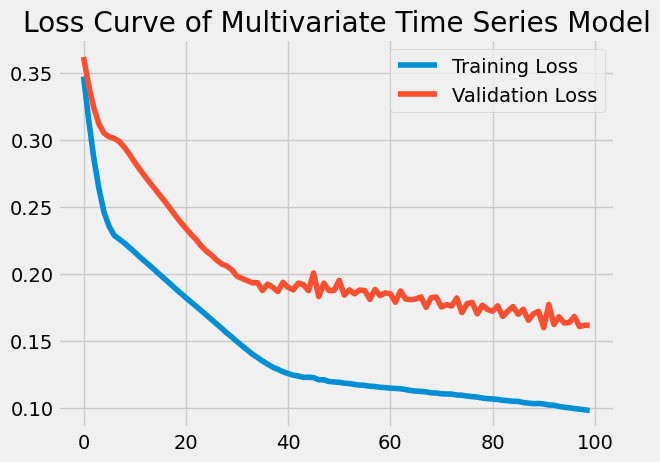

In [ ]:
with open('history_multivariate.json', 'r') as f:
    hist_ = f.readlines()
print(ast.literal_eval(hist_[0])["val_loss"])
plt.plot(ast.literal_eval(hist_[0])["loss"])
plt.plot(ast.literal_eval(hist_[0])["val_loss"])
plt.legend(["Training Loss", "Validation Loss"])
plt.title("Loss Curve of Multivariate Time Series Model")


In [ ]:
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)
##Transformback to original form
train_predict=scalers['scaler_no_of_orders'].inverse_transform(train_predict)
test_predict=scalers['scaler_no_of_orders'].inverse_transform(test_predict)

13/13 [==============================] - 0s 7ms/step


In [ ]:
print(test_predict)
print(scaler.inverse_transform(ytest.reshape(-1,1)))

[[  0.8960366 ]
 [ 12.98144   ]
 [ 17.091612  ]
 [ 19.18313   ]
 [ 18.298018  ]
 [ 19.92944   ]
 [ 21.20734   ]
 [ 21.613981  ]
 [ 20.358795  ]
 [ 16.366714  ]
 [ 10.863135  ]
 [  8.762217  ]
 [ 11.239812  ]
 [ 12.272638  ]
 [ 10.445783  ]
 [  5.900411  ]
 [  1.0693703 ]
 [ -1.1090875 ]
 [  0.8513361 ]
 [  6.2645736 ]
 [ 13.558742  ]
 [ 20.147427  ]
 [ 22.501217  ]
 [ 21.878029  ]
 [ 24.037014  ]
 [ 25.42947   ]
 [ 25.1974    ]
 [ 22.410585  ]
 [ 18.531002  ]
 [ 14.008146  ]
 [  9.960378  ]
 [  9.050402  ]
 [  9.085423  ]
 [  6.10573   ]
 [  1.2281518 ]
 [ -4.3402643 ]
 [ -8.288911  ]
 [ -2.503446  ]
 [  5.051411  ]
 [ 15.6538315 ]
 [ 24.763807  ]
 [ 28.706264  ]
 [ 30.961397  ]
 [ 30.124596  ]
 [ 30.970606  ]
 [ 30.459742  ]
 [ 26.7046    ]
 [ 22.97564   ]
 [ 19.701496  ]
 [ 14.506949  ]
 [ 13.213853  ]
 [ 12.274588  ]
 [ 12.688469  ]
 [ 12.84394   ]
 [ 12.11245   ]
 [ 10.634875  ]
 [  7.300227  ]
 [ 12.14978   ]
 [ 15.719072  ]
 [ 22.941784  ]
 [ 28.084906  ]
 [ 30.493425  ]
 [ 30.59

In [ ]:
multivariate_data[:,0]

array([-1.        , -1.        , -0.88679245, ..., -0.96226415,
       -1.        , -1.        ])

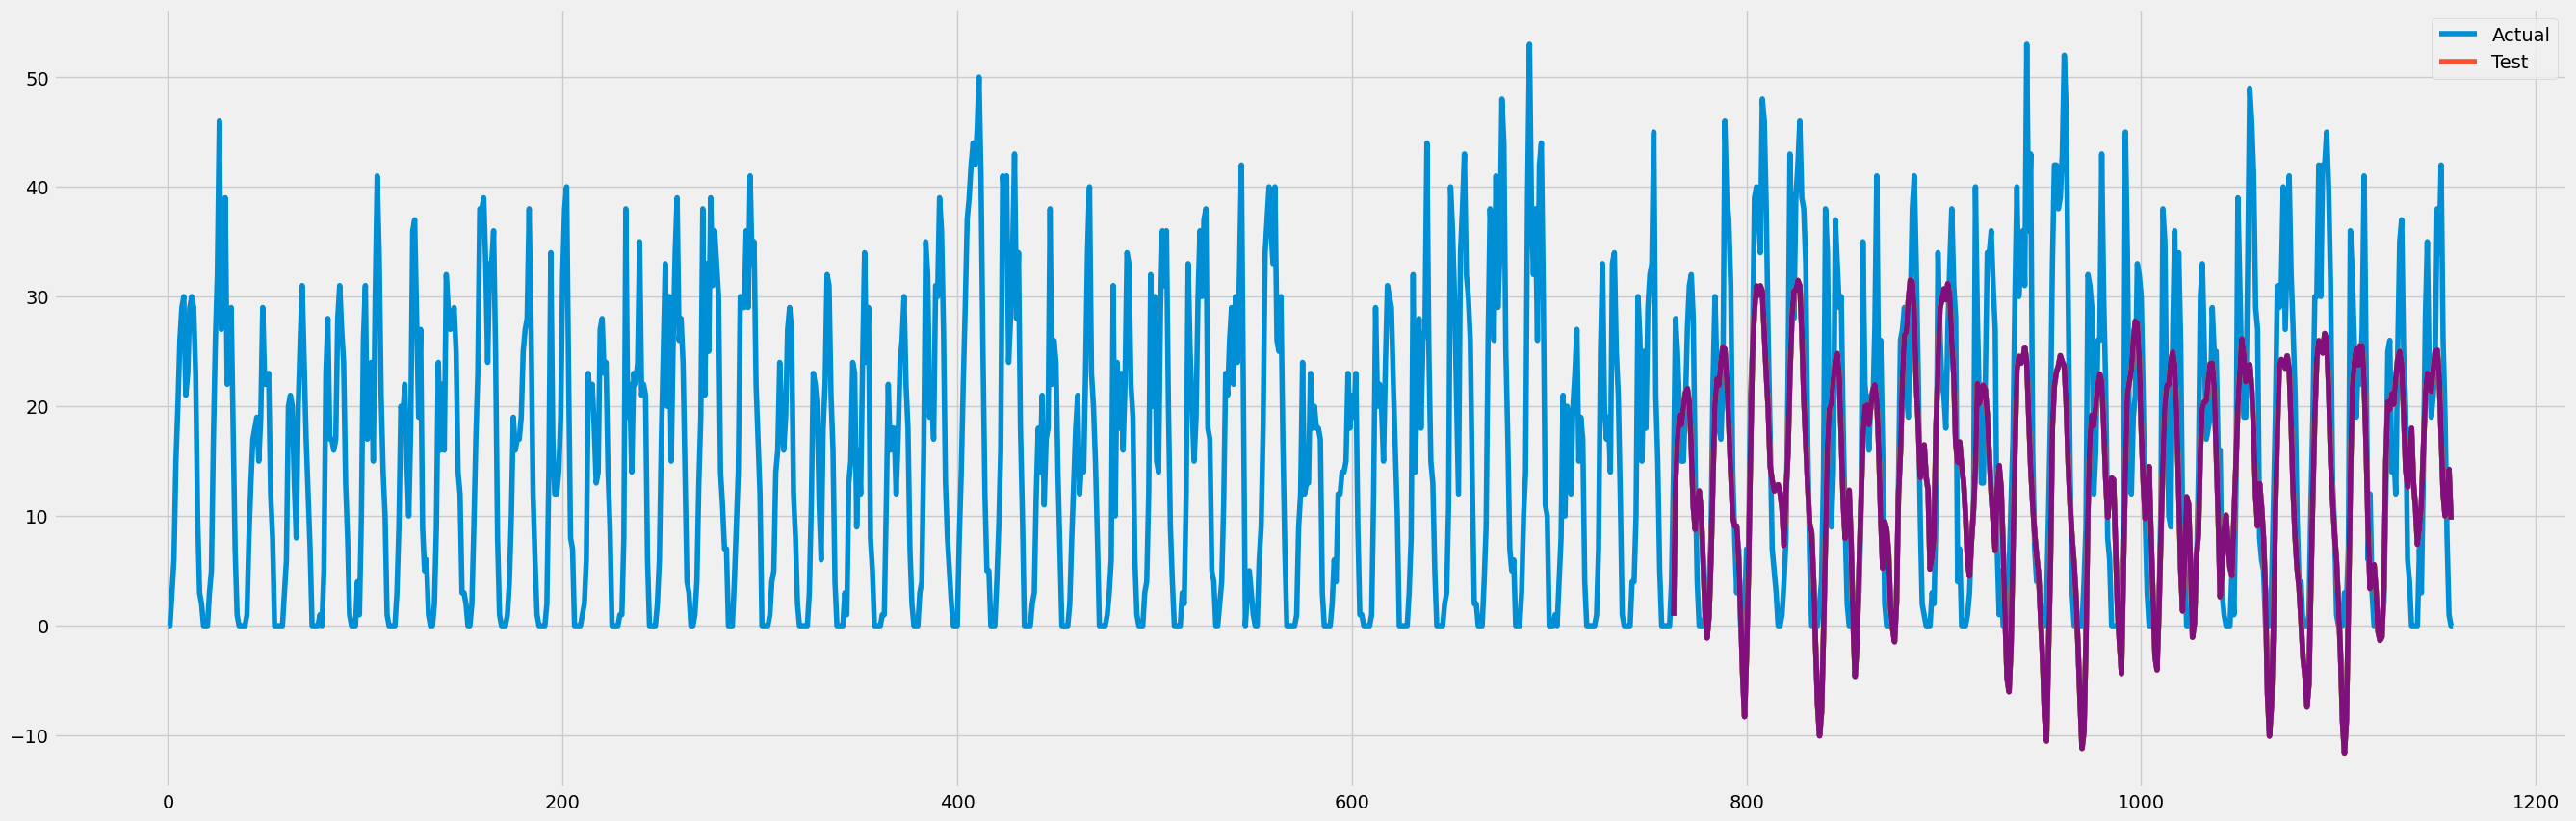

In [ ]:
plt.figure(figsize=(30,10))
look_back=10
trainPredictPlot = np.empty_like(multivariate_data)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = np.empty_like(multivariate_data)
testPredictPlot[:, :] = np.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(multivariate_data)-1, :] = test_predict
# plot baseline and predictions
plt.plot(scalers['scaler_no_of_orders'].inverse_transform(multivariate_data[:,0].reshape(-1,1)))
plt.plot(testPredictPlot)
plt.legend(["Actual","Test"])
plt.show()


In [ ]:
math.sqrt(mean_squared_error(ytest,test_predict))

17.01604048561706

In [ ]:
import tensorflow

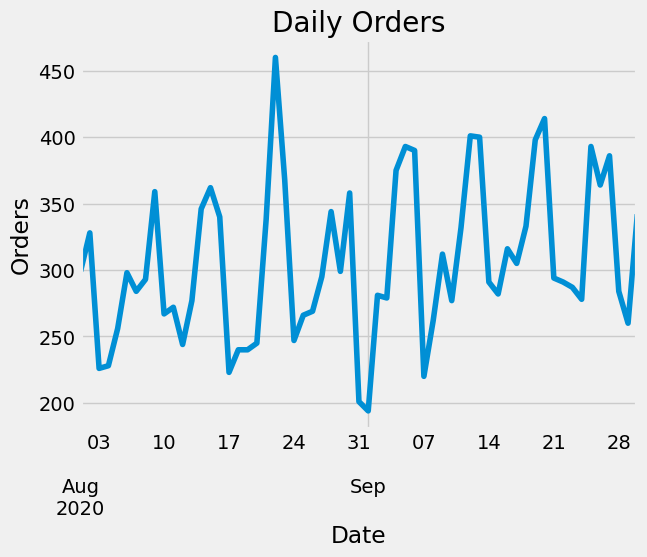

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.68 sec
 ARIMA(0,0,0)(0,0,0)[7] intercept   : AIC=673.457, Time=0.02 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,0)[7] intercept   : AIC=631.930, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,1)[7] intercept   : AIC=644.723, Time=0.33 sec
 ARIMA(0,0,0)(0,0,0)[7]             : AIC=875.827, Time=0.04 sec
 ARIMA(1,0,0)(0,0,0)[7] intercept   : AIC=665.500, Time=0.08 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,0)[7] intercept   : AIC=628.029, Time=2.98 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(2,0,1)[7] intercept   : AIC=inf, Time=0.35 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,0)(1,0,1)[7] intercept   : AIC=633.026, Time=0.31 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(2,0,0)[7] intercept   : AIC=630.323, Time=0.43 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(2,0,0)(2,0,0)[7] intercept   : AIC=631.593, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(2,0,0)[7] intercept   : AIC=inf, Time=0.59 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,0)[7] intercept   : AIC=626.809, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,0)[7] intercept   : AIC=630.549, Time=0.26 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,1)[7] intercept   : AIC=inf, Time=0.49 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[7] intercept   : AIC=624.673, Time=0.37 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,2)[7] intercept   : AIC=627.181, Time=0.52 sec
 ARIMA(0,0,1)(0,0,0)[7] intercept   : AIC=661.284, Time=0.04 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(0,0,2)[7] intercept   : AIC=640.604, Time=0.24 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(2,0,2)[7] intercept   : AIC=inf, Time=0.70 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,0)(1,0,1)[7] intercept   : AIC=630.811, Time=0.28 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,1)(1,0,1)[7] intercept   : AIC=inf, Time=0.39 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,2)(1,0,1)[7] intercept   : AIC=633.836, Time=0.41 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(1,0,2)(1,0,1)[7] intercept   : AIC=inf, Time=0.50 sec


/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


 ARIMA(0,0,1)(1,0,1)[7]             : AIC=644.977, Time=0.28 sec

Best model:  ARIMA(0,0,1)(1,0,1)[7] intercept
Total fit time: 11.572 seconds


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                     
Dep. Variable:                      no_of_orders   No. Observations:                   61
Model:             SARIMAX(0, 0, 1)x(1, 0, 1, 7)   Log Likelihood                -272.556
Date:                           Mon, 28 Apr 2025   AIC                            553.112
Time:                                   06:28:40   BIC                            560.917
Sample:                               08-01-2020   HQIC                           556.104
                                    - 09-30-2020                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1        -14.9439     41.621     -0.359      0.720     -96.519      66.631
ar.S.L7        1.0156      0.019     53.881

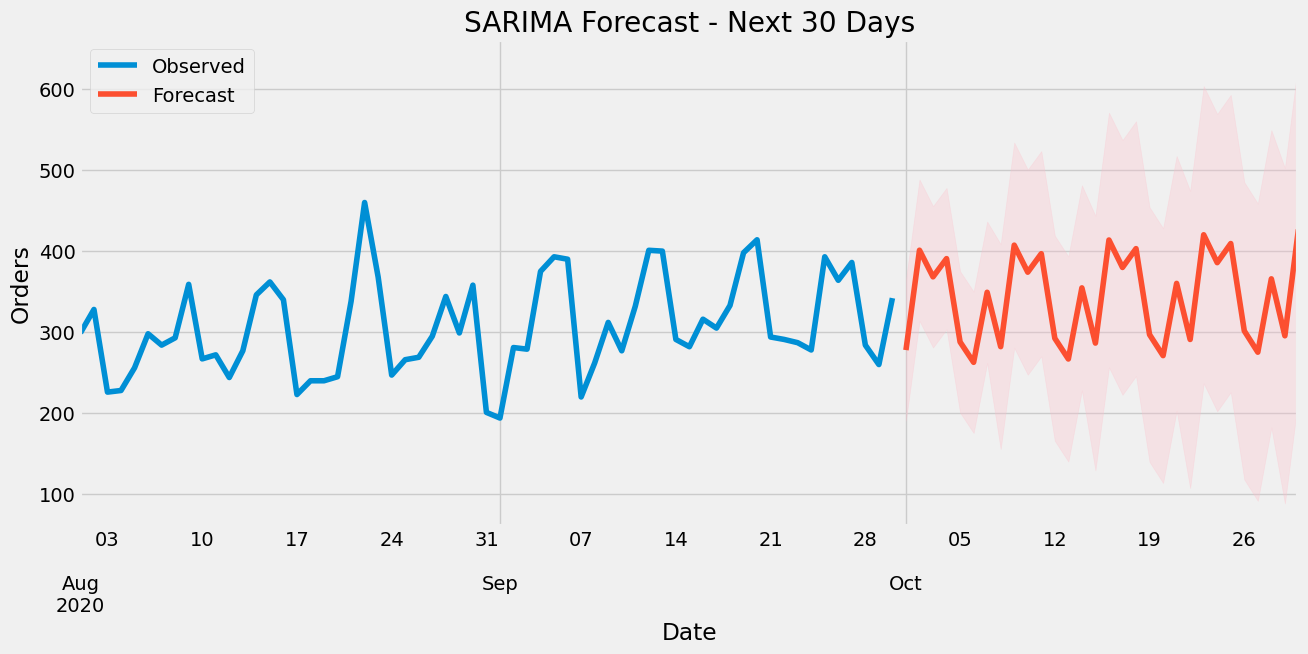

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

# Combine date and hour into a datetime column
df1['datetime'] = pd.to_datetime(df1['date']) + pd.to_timedelta(df1['hour'], unit='h')

# Set datetime as index and resample only the 'no_of_orders' column
df_daily = df1.set_index("datetime").resample("D")["no_of_orders"].sum()


# Step 3: Plot the daily order counts
df_daily.plot(title="Daily Orders")
plt.xlabel("Date")
plt.ylabel("Orders")
plt.show()

# Step 4: Use auto_arima to find optimal SARIMA parameters
stepwise_fit = auto_arima(df_daily,
                          seasonal=True,
                          m=7,  # weekly seasonality
                          trace=True,
                          suppress_warnings=True)

# Step 5: Fit SARIMA model
model = SARIMAX(df_daily,
                order=stepwise_fit.order,
                seasonal_order=stepwise_fit.seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Step 6: Print model summary
print(results.summary())

# Step 7: Forecast next 30 days
forecast = results.get_forecast(steps=30)
pred_ci = forecast.conf_int()

# Step 8: Plot forecast with confidence intervals
ax = df_daily.plot(label='Observed', figsize=(14, 6))
forecast.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.xlabel('Date')
plt.ylabel('Orders')
plt.title("SARIMA Forecast - Next 30 Days")
plt.legend()
plt.show()



In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Step 1: Train-Test Split (let's take last 30 days as test)
train = df_daily[:-30]
test = df_daily[-30:]

# Step 2: Fit SARIMA on training data
model = SARIMAX(train,
                order=stepwise_fit.order,
                seasonal_order=stepwise_fit.seasonal_order,
                enforce_stationarity=False,
                enforce_invertibility=False)
results = model.fit()

# Step 3: Forecast on test period
forecast = results.get_forecast(steps=30)
predicted = forecast.predicted_mean

# Step 4: Evaluation Metrics
mse = mean_squared_error(test, predicted)
rmse = np.sqrt(mse)
mae = mean_absolute_error(test, predicted)

print(f"📊 Evaluation Metrics:")
print(f"✅ MSE  = {mse:.2f}")
print(f"✅ RMSE = {rmse:.2f}")
print(f"✅ MAE  = {mae:.2f}")


📊 Evaluation Metrics:
✅ MSE  = 1176.37
✅ RMSE = 34.30
✅ MAE  = 28.79


/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [ ]:
print("Mean Actual Orders:", df_daily.mean())


Mean Actual Orders: 306.655737704918


In [ ]:
print(df1.columns)
df1.head()
